# TP 1.4 - Major Assignment : source code

In [1]:
%matplotlib notebook

<div class="alert alert-danger">
  <b>Major Assignment :</b> <br/>  
The aim of the assignment is to propose and develop a machine learning approach to detect [pulsars]
(https://www.youtube.com/watch?v=gjLk_72V9Bw). To this aim you have to:

Analyse the given dataset.
Define the problem as a the Machine Learning problem.
Define the methodology and protocol you will use to tackle the problem.
Implement various approaches that are suited to this problem.
Discuss the results you have obtained.
Recommend your final solution motivating it.

The provided dataset as well as its decription can be accessed at the following address: https://archive.ics.uci.edu/ml/machine-learning-databases/00372/
        </div>

## Import des bibliothèques et du dataset

In [2]:
# bibliothèques
import pandas as pd
import csv
import numpy as np
import graphviz
import matplotlib.pyplot as plt

# dataset
data = open("HTRU_2.csv", "r")
data_list = list(csv.reader(data))
data_list = list(np.float_(data_list))

## Analyse du dataset

### Vérification : données manquantes ?

In [3]:
for i in range(0, 17898):
    if len(data_list[i]) != 9.0:
        print(i)

Rien ne s'affiche : il n'y a pas de données manquantes.

### Calcul des moyennes, variances et écarts-types pour chaque colonne

In [4]:
moy = [] # moyenne
var = [] # variance 
ecart_type = [] # écart-type

for c in range(0, 9):
    n = 17898
    s = 0.0
    for l in range(0, n):
        s += data_list[l][c]

    moy.append(s / n)

    v = 0.0
    for l in range(0, n):
        v += (data_list[l][c] - moy[c]) ** 2

    var.append(v / n)
    ecart_type.append(np.sqrt(var[c]))

print("Moyenne = {}".format(moy))
print("Variance = {}".format(var))
print("Ecart-type = {}".format(ecart_type))

Moyenne = [111.07996834492681, 46.54953156153429, 0.4778572581019128, 1.7702789980713511, 12.614399658311525, 26.326514703918694, 8.303556116638273, 104.85770870366196, 0.09157447759526204]
Variance = [658.0363246090876, 46.82662485126456, 1.132117260643336, 38.04102827819613, 868.603132969526, 379.08200556314085, 20.303729364988474, 11344.713243182856, 0.08318859264841917]
Ecart-type = [25.652218707337727, 6.842998235515231, 1.0640099908569167, 6.16774093799311, 29.472073781285328, 19.4700283914313, 4.505965974681619, 106.51156389417469, 0.2884243274212825]


La moyenne de la dernière colonne indique que le taux de pulsars détectés est de 9,1574 %.

## Implémentation de diverses approches

In [5]:
# Séparation data/label (label : 9e colonne)
labels=[]
data=[]

for i in range (0, 17898):
    labels.append(data_list[i][8])
    data.append(data_list[i][0:8])

### Régression logistique

<IPython.core.display.Javascript object>


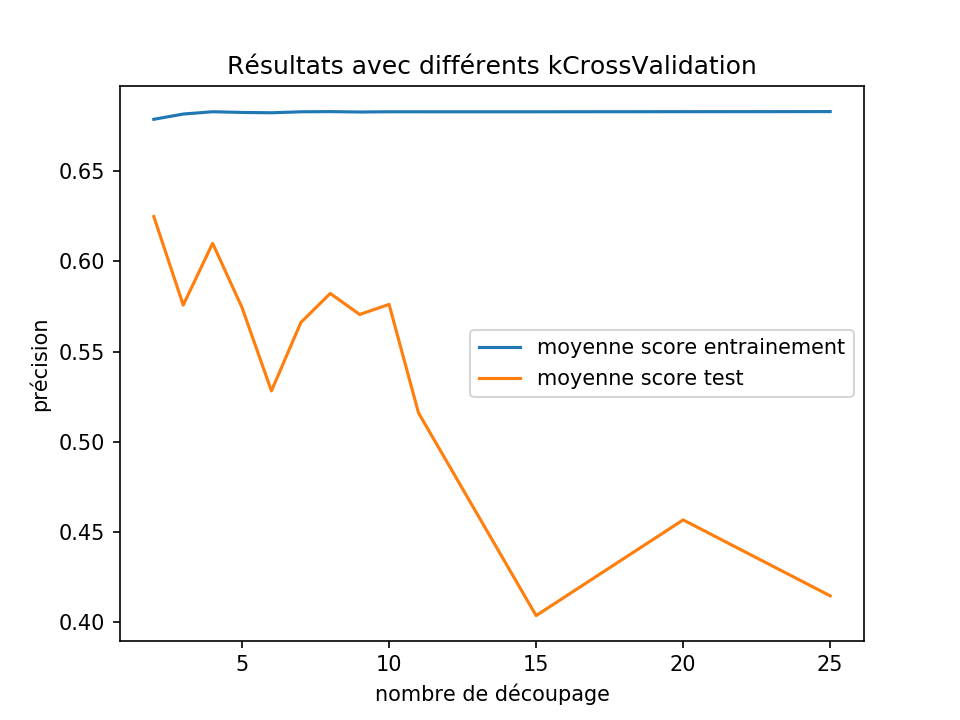

Maximum des moyennes de score de test = 0.6248900525164228


In [6]:
## Régression logistique
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.linear_model import LinearRegression

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        lr = LinearRegression().fit(X_train,y_train)
        somme_train_score+=lr.score(X_train,y_train)
        somme_test_score+=lr.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))
    
listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

### Ridge

<IPython.core.display.Javascript object>


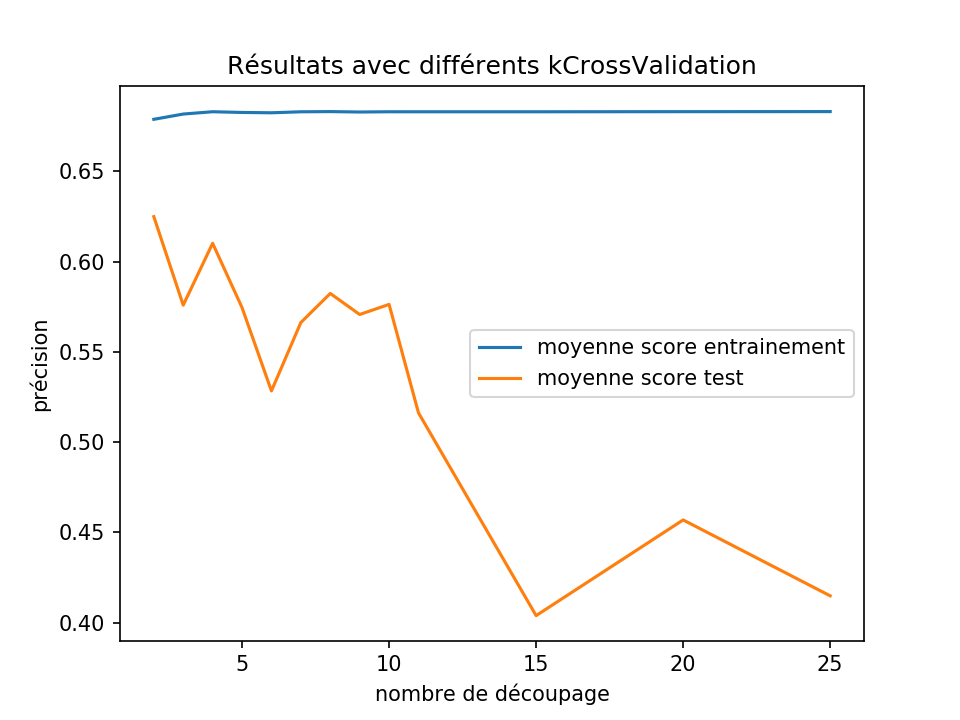

Maximum des moyennes de score de test = 0.6249072834365486


In [7]:
## Ridge
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.linear_model import Ridge

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        lr = Ridge().fit(X_train,y_train)
        somme_train_score+=lr.score(X_train,y_train)
        somme_test_score+=lr.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))
    
listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

### Lasso

<IPython.core.display.Javascript object>


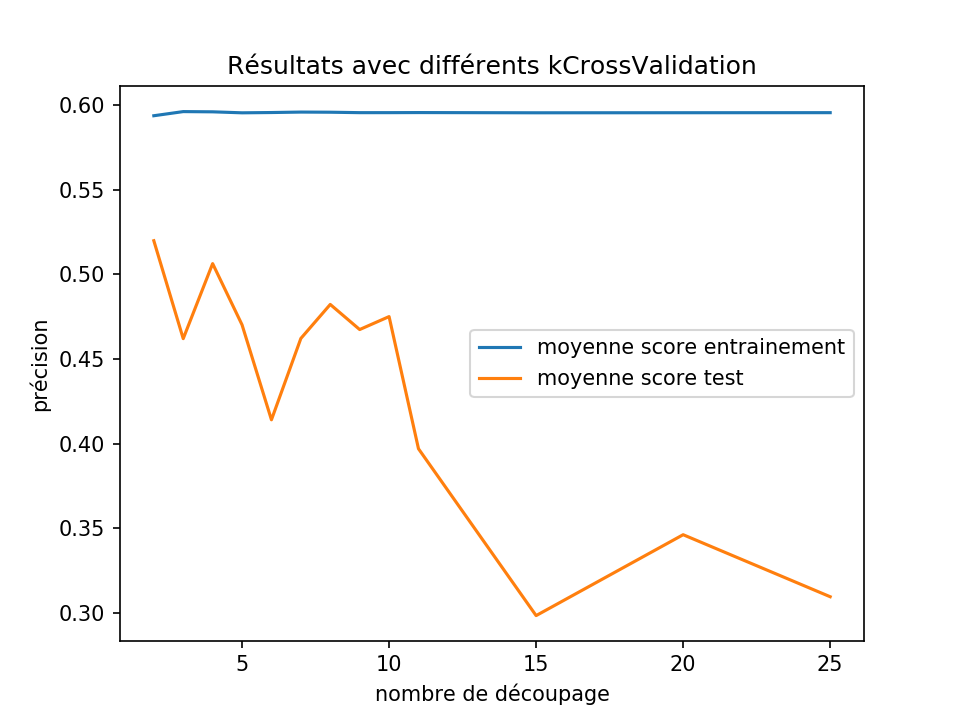

Maximum des moyennes de score de test = 0.5198499357800268


In [8]:
## Lasso
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn import linear_model

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        lr = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
        somme_train_score+=lr.score(X_train,y_train)
        somme_test_score+=lr.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))

listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

### Perceptron

<IPython.core.display.Javascript object>


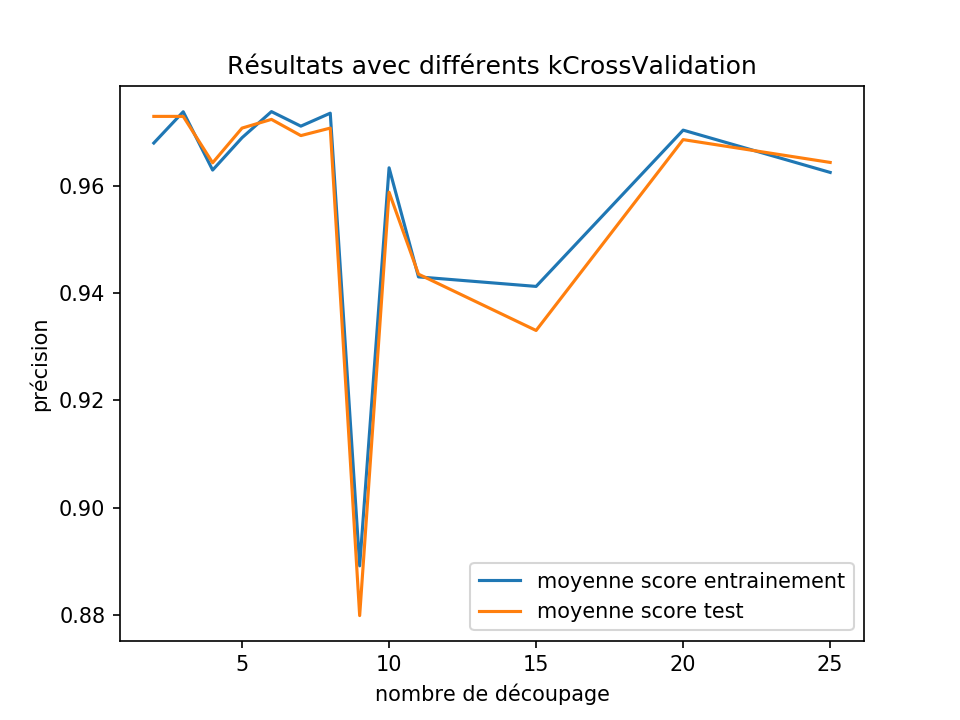

Maximum des moyennes de score de test = 0.9730137445524639


In [9]:
## PERCEPTRON
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn import linear_model

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        clf = linear_model.Perceptron(tol=1e-3, random_state=0)
        clf.fit(X_train,y_train)
        somme_train_score+=clf.score(X_train,y_train)
        somme_test_score+=clf.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))

listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

### Naive Bayes (Bernoulli)

<IPython.core.display.Javascript object>


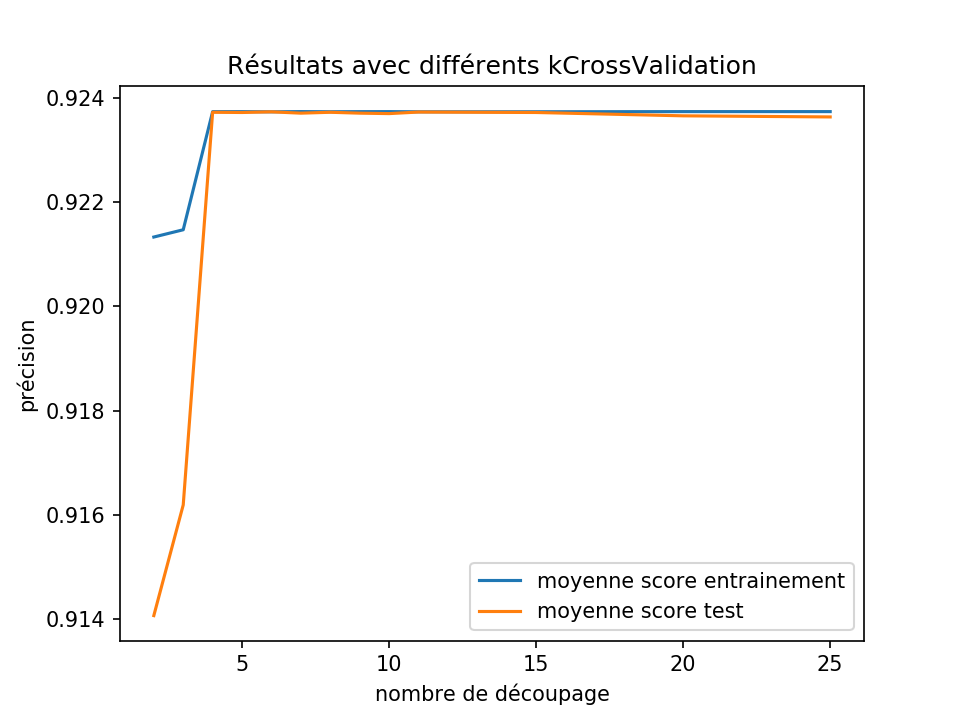

Maximum des moyennes de score de test = 0.9237344954743546


In [10]:
## NAIVE BAYES
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        clf = BernoulliNB()
        clf.fit(X_train,y_train)
        somme_train_score+=clf.score(X_train,y_train)
        somme_test_score+=clf.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))

listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

<div class="alert alert-danger">
  <b>Attention</b> <br/>  
Les propositions suivantes sont trop complexes pour être exécutées et testées</div>

### SVC

In [ ]:
## SVC : trop complexe
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn import linear_model

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        clf = SVC(gamma='auto')
        clf.fit(X_train,y_train)
        somme_train_score+=clf.score(X_train,y_train)
        somme_test_score+=clf.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))

listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

### Arbres de décision

In [ ]:
# ARBRES DE DECISION : trop complexe
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        clf = DecisionTreeRegressor()
        clf.fit(X_train,y_train)
        somme_train_score+=clf.score(X_train,y_train)
        somme_test_score+=clf.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))

listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)

### Réseau de neurones

In [ ]:
# RESEAU DE NEURONES : trop complexe
# ESTHER JAMET & ALEXIS CARBILLET

from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

def moyennekCrossValidation(k,scoreTrain,scoreTest): # moyenne des coefficients
    return (scoreTrain/k,scoreTest/k)

def kCrossValidation(k, data, target): # k le nombre de sous intervalles
    nb_sousIntervalle=int(np.floor(len(data)/k))
    x=range(len(data)-nb_sousIntervalle) # on enlève le nombre de données de test
    somme_train_score=0
    somme_test_score=0
    for i in range(k):
        A = data[:i*nb_sousIntervalle] # haut matrice inputs train
        B = data[(i+1)*nb_sousIntervalle:] # bas matrice inputs train
        X_train = A+B # on forme une matrice globale
        X_test=data[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        C = labels[:i*nb_sousIntervalle] # haut matrice outputs train
        D = labels[(i+1)*nb_sousIntervalle:] # bas matrice outputs train
        y_train = C+D # on forme une matrice globale
        y_test=labels[i*nb_sousIntervalle:(i+1)*nb_sousIntervalle]
        clf = MLPRegressor()
        clf.fit(X_train,y_train)
        somme_train_score+=clf.score(X_train,y_train)
        somme_test_score+=clf.score(X_test,y_test)
    m=moyennekCrossValidation(k,somme_train_score,somme_test_score) # moyenne des scores
    return m
    
def listeKCrossValidation(liste_k, data, target): # pour une liste de K
    liste_score_train=[]
    liste_score_test=[]
    box=[]
    mini=min(liste_k) # le plus petit découpage aura le plus grand nombre de données test
    nb_sousIntervalle=int(np.floor(len(data)/mini))
    for i in liste_k:
        liste_score_train.append(kCrossValidation(i, data, target)[0])
        liste_score_test.append(kCrossValidation(i, data, target)[1])
    plt.plot(liste_k,liste_score_train,label='moyenne score entrainement')
    plt.plot(liste_k,liste_score_test,label='moyenne score test')
    plt.legend()
    plt.title('Résultats avec différents kCrossValidation')
    plt.xlabel("nombre de découpage")
    plt.ylabel('précision')
    plt.show()
    print("Maximum des moyennes de score de test = {}".format(max(liste_score_test)))

listeKCrossValidation([2,3,4,5,6,7,8,9,10,11,15,20,25], data, labels)